In [1]:
import warnings
warnings.filterwarnings("ignore")

## IMPORTS

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
import scipy.stats as si

plt.style.use('seaborn')

## 1.

### Numpy

In [3]:
a = np.arange(15, dtype=np.float)
a

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

built-in methods for an ndarray class

In [4]:
# AVERAGE
a.mean()

7.0

In [5]:
# STANDARD DEVIATION
a.std()

4.320493798938574

#### Basic Vecrization code

In [6]:
a = np.arange(1, 16).reshape((5, 3))
b = np.arange(1, 16).reshape((5, 3)) * np.random.randn()

In [7]:
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [8]:
b

array([[ 0.7256066 ,  1.4512132 ,  2.1768198 ],
       [ 2.9024264 ,  3.628033  ,  4.35363959],
       [ 5.07924619,  5.80485279,  6.53045939],
       [ 7.25606599,  7.98167259,  8.70727919],
       [ 9.43288579, 10.15849239, 10.88409899]])

####  Sum

In [9]:
a + b

array([[ 1.7256066 ,  3.4512132 ,  5.1768198 ],
       [ 6.9024264 ,  8.628033  , 10.35363959],
       [12.07924619, 13.80485279, 15.53045939],
       [17.25606599, 18.98167259, 20.70727919],
       [22.43288579, 24.15849239, 25.88409899]])

#### Subtraction

In [10]:
a - b

array([[0.2743934 , 0.5487868 , 0.8231802 ],
       [1.0975736 , 1.371967  , 1.64636041],
       [1.92075381, 2.19514721, 2.46954061],
       [2.74393401, 3.01832741, 3.29272081],
       [3.56711421, 3.84150761, 4.11590101]])

#### Cuutom Operation

In [11]:
def custom(x):
    return np.sin(x) + x * np.exp(x)

In [12]:
custom(a)

array([[3.55975281e+00, 1.56874096e+01, 6.03977308e+01],
       [2.17635798e+02, 7.41106871e+02, 2.42029335e+03],
       [7.67708910e+03, 2.38486533e+04, 7.29281675e+04],
       [2.20264114e+05, 6.58614559e+05, 1.95305696e+06],
       [5.75137452e+06, 1.68364610e+07, 4.90352612e+07]])

In [13]:
custom(b)

array([[2.16268094e+00, 7.18705674e+00, 2.00175909e+01],
       [5.31141576e+01, 1.36086993e+02, 3.37606888e+02],
       [8.15062218e+02, 1.92620709e+03, 4.47826664e+03],
       [1.02802946e+04, 2.33619296e+04, 5.26515544e+04],
       [1.17840559e+05, 2.62183489e+05, 5.80357858e+05]])

In [23]:
import yfinance as yf

### YFinance

#### Download Data

In [14]:
data = yf.download("GOOG", start="2021-02-01", end="2022-02-01")

[*********************100%***********************]  1 of 1 completed


In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200
2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700
2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200
2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300
2021-02-05,2070.000000,2102.510010,2059.330078,2098.000000,2098.000000,1535100


### Matplotlib

Text(0.5, 1.0, 'Gamma Plot')

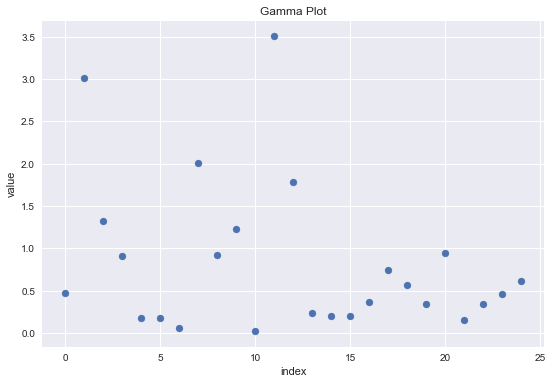

In [16]:
import matplotlib.pyplot as plt

np.random.seed(42)
y = np.random.gamma(1, size=25)
x = np.arange(len(y))

plt.figure(figsize=(9, 6))
plt.scatter(x, y)
plt.xlabel('index')
plt.ylabel('value')
plt.title('Gamma Plot')

## Sinh and Cosh plot

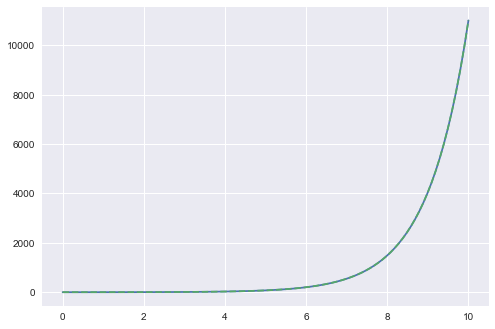

In [17]:
x = np.linspace(0,10,100)

fig = plt.figure()
plt.plot(x, np.sinh(x), '-')
plt.plot(x, np.cosh(x), '--')

## 2.

## Implied Volatility

The Newton-Rahpson approach is one of the most efficient methods for estimating implied volatility using market observed price and the theoretical Black-Scholes model.

The general description of this method starts with a function f() for which we want to find.
$$ f(x) = 0 $$

The function f() needs to be differentiable. Given a first guess $x_{0}$, iterate by 
$$x_{i+1} = x_{i} - \frac{f(x_{i})}{f^{'}(x_{i})}$$
until
$$\mid f(x_{i})\mid < \xi$$
where $\xi$ is the desired accuracy

In our case $$f(x) = C_{obs} - C_{\sigma}$$

and, each new iteration will calculate
$$\sigma_{i+1} = \sigma_{i} + \frac{f(x)}{f^{'}(x)}$$

In [18]:
TSLA = yf.download("TSLA", start="2021-05-20", end="2022-05-20")

[*********************100%***********************]  1 of 1 completed


In [19]:
# 12 months annualized volatility
log_return = np.log(TSLA['Adj Close'] / TSLA['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 57.45 %


In [20]:
# 6 months annualized volatility
vol_6 = np.sqrt(252) * log_return[125:-1].std()
print('The 6 months annualised volatility is', round(vol_6*100,2), '%')

The 6 months annualised volatility is 68.49 %


In [22]:
# 3 months annualized volatility
vol_3 = np.sqrt(252) * log_return[-70:-1].std()
print('The 3 months annualised volatility is', round(vol_3*100,2), '%')

The 6 months annualised volatility is 69.83 %


In [24]:
def newton_vol_call(S, K, T, C, r):
    
    '''
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: risk free rate
    #sigma: volatility of underlying asset
    ''' 
   
    MAX_ITERATIONS = 1000
    tolerance = 0.000001
    
    sigma = 0.56
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = C - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
    return sigma

In [25]:
TESLA = yf.Ticker("TSLA")
opt = TESLA.option_chain('2022-05-20')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA220520C00050000,2022-05-19 17:10:10+00:00,50.0,660.65,659.60,661.50,-27.039978,-3.932001,6,39,14.664063,True,REGULAR,USD
1,TSLA220520C00100000,2022-05-18 16:44:18+00:00,100.0,615.70,609.95,611.70,0.000000,0.000000,1,65,11.378909,True,REGULAR,USD
2,TSLA220520C00150000,2022-05-19 17:24:23+00:00,150.0,559.89,558.65,560.95,-42.909973,-7.118442,6,94,9.220707,True,REGULAR,USD
3,TSLA220520C00200000,2022-05-19 13:39:23+00:00,200.0,512.35,509.50,511.60,-22.000000,-4.117152,2,129,6.960939,True,REGULAR,USD
4,TSLA220520C00250000,2022-05-18 19:57:27+00:00,250.0,460.60,459.10,461.00,0.000000,0.000000,6,21,6.337893,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,TSLA220520C02375000,2022-05-16 13:30:57+00:00,2375.0,0.01,0.00,0.01,0.000000,0.000000,2,242,4.250005,False,REGULAR,USD
209,TSLA220520C02400000,2022-05-13 14:11:01+00:00,2400.0,0.01,0.00,0.00,0.000000,0.000000,53,919,0.500005,False,REGULAR,USD
210,TSLA220520C02425000,2022-05-19 16:32:47+00:00,2425.0,0.01,0.00,0.01,0.000000,0.000000,1,1397,4.250005,False,REGULAR,USD
211,TSLA220520C02450000,2022-05-12 15:32:20+00:00,2450.0,0.01,0.00,0.00,0.000000,0.000000,2,1931,0.500005,False,REGULAR,USD


## Spot price

In [26]:

S = TSLA['Adj Close'][-1]
print('The spot price is $', round(S, 2), '.')

The spot price is $ 709.8 .


## Call price

In [27]:
opt.calls.lastPrice[opt.calls.strike == 1000.00]

117    0.01
Name: lastPrice, dtype: float64

In [13]:
impvol = newton_vol_call(S, 1000.00, 4/52, float(opt.calls.lastPrice[opt.calls.strike == 1000.00]), 0.02)
print('The implied volatility is', round(impvol*100, 2) , '% for the one-month call with strike $ 1000.00' )
 

The implied volatility is 28.72 % for the one-month call with strike $ 1000.00


## 3.

## Binomial Tree (CRR Tree)

### Data Input

The Binomial Tree pricing model is a discrete model. Valuation is done iteratively, starting at the end of the tree and going backwards to the beginning (valuation date). The value determined at each stage represents the option's value at that moment in time.

In [1]:
S0 = 25            # spot stock price   
K = 24             # strike price
T = 6/12          # Time to maturity
r = 0.05           # Risk free rate    
sig = 0.2          # volatility
N = 2              # Number of time steps  
payoff = "call"    # the option type 

## Step 1: Create the binomial price tree.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor ( u or d) per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ). So, if S is the current price, then in the next period the price will either be S_up = Su or S_down = Sd.

# u and d

In [4]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
print(f'Price movement UP factor {round(u, 4)} and DOWN factor {round(d, 4)}')

Price movement UP factor 1.1052 and DOWN factor 0.9048


In [5]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[25.        , 27.62927295, 30.53506895],
       [ 0.        , 22.62093545, 25.        ],
       [ 0.        ,  0.        , 20.46826883]])

In [6]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability

In [7]:
print('Probalilty for moving  up : ', round(p, 4))

Probalilty for moving  up :  0.5378


## Step 2: Find option value at each final node.

The option value is simply its intrinsic, or exercise, value at each node of the tree, i.e. upon expiry of the option: Max[(K-S n),0] for a put option, where K is the strike price and S n is the spot price of the underlying asset during the n-th period.

In [8]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 6.53506895],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        ]])

## Step 3: Find option value at earlier nodes.

After completing the preceding phase, the option value is computed for each node, starting with the penultimate time step and moving backwards to the first node of the tree (valuation date), where the determined result is the option value.

### European Option

In [9]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[2.32838692, 3.92740574, 6.53506895],
       [0.        , 0.53112761, 1.        ],
       [0.        , 0.        , 0.        ]])

In [10]:
print('European ' + payoff, str( round(V[0,0], 4)))

European call 2.3284
